# Category Matching

In [6]:
#Import all needed functions
from ncc_categories.cats import queryAll, listCategories, singleQuery, printTree

In [7]:
import pandas as pd

#Read in the input file
tsca_df = pd.read_excel('../data/raw/tsca_categorisation_071124_wmappingdict.xlsx')

In [8]:
#Find the column names for the necessary information
tsca_df.columns

Index(['Unnamed: 0', 'dtxsid', 'PREFERRED_NAME', 'CASRN', 'smiles', 'errors',
       'qsar_ready_smiles', 'physical_form', 'NCC', 'ClassyFire', 'group',
       'final_centroid', 'final_dist', 'lt65_picks', 'gt65_picks',
       'MaxMin_selection_picks', 'diverse_picks', 'category_size',
       'final_picks', 'screenable', 'screenable_centroid',
       'screenable_centroid_id', 'screening_analogues', 'screening_dist',
       'tested.count', 'phospho.substruct', 'silico.substruct', 'elements',
       'elements_permitted', 'silicon_containing', 'MolWeight',
       'nbLipinskiFailures', 'LogP_pred', 'LogP_predRange', 'AD_LogP',
       'AD_index_LogP', 'Conf_index_LogP', 'MP_pred', 'MP_predRange', 'AD_MP',
       'AD_index_MP', 'Conf_index_MP', 'BP_pred', 'BP_predRange', 'AD_BP',
       'AD_index_BP', 'Conf_index_BP', 'LogVP_pred', 'VP_predRange', 'AD_VP',
       'AD_index_VP', 'Conf_index_VP', 'LogWS_pred', 'WS_predRange', 'AD_WS',
       'AD_index_WS', 'Conf_index_WS', 'LogHL_pred', 'HL_pr

In [9]:
#Rename columns for processing by categories.py
tsca_df = tsca_df.rename(columns={'MolWeight':'mol_weight', 'dtxsid':'dsstox_sid', 'LogP_pred':'logp', \
                                  'WS_pred_mg/L':'ws'})

In [10]:
#Use smiles to calculate "mol" column
from rdkit import Chem
tsca_df['mol'] = [Chem.MolFromSmiles(i) for i in tsca_df['smiles']]

[14:39:46] Explicit valence for atom # 22 O, 2, is greater than permitted
[14:39:46] Explicit valence for atom # 0 O, 2, is greater than permitted
[14:39:46] SMILES Parse Error: syntax error while parsing: -
[14:39:46] SMILES Parse Error: check for mistakes around position 1:
[14:39:46] -
[14:39:46] ^
[14:39:46] SMILES Parse Error: Failed parsing SMILES '-' for input: '-'
[14:39:46] Explicit valence for atom # 1 Br, 3, is greater than permitted
[14:39:46] Explicit valence for atom # 1 Cl, 3, is greater than permitted
[14:39:46] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[14:39:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[14:39:46] Explicit valence for atom # 4 C, 5, is greater than permitted
[14:39:46] Explicit valence for atom # 4 Al, 4, is greater than permitted
[14:39:46] Explicit valence for atom # 1 Al, 6, is greater than permitted
[14:39:46] Explicit valence for atom # 0 O, 3, is greater than permitted
[14:39:46] Explicit valence for atom

In [11]:
# Since some of the chemicals (28) could not be processed by RDkit, remove those
tsca_df = tsca_df.drop(index = list(tsca_df.loc[[i is None for i in tsca_df['mol']]].index))
tsca_df

,Unnamed: 0,dsstox_sid,PREFERRED_NAME,CASRN,smiles,errors,qsar_ready_smiles,physical_form,NCC,ClassyFire,...,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD,HLC,WS_pred_mol/L,ws,vendor_count,in_sigma_aldrich,mol
0,0,DTXSID4063036,1-Nonyne,3452-09-3,CCCCCCCC#C,NaN,CCCCCCCC#C,liquid,"('Neutral Organics',)",Acetylides,...,[4.48:4.51],0.0,0.4990,0.4420,6.606934e-02,6.025596e-05,7.479283,47.0,1.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9EF5...
1,1,DTXSID30870753,1-Hexyne,693-02-7,CCCCC#C,NaN,CCCCC#C,liquid,"('Neutral Organics',)",Acetylides,...,[2.69:2.77],0.0,0.4990,0.4470,1.122018e-01,4.897788e-03,402.001885,63.0,1.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9EF5...
2,2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,C#CCCCCCC#C,NaN,C#CCCCCCC#C,liquid,"('Neutral Organics',)",Acetylides,...,[3.4:3.84],0.0,0.2950,0.3680,7.943282e-03,1.047129e-03,125.753752,39.0,1.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9EF5...
3,3,DTXSID9061097,1-Pentadecyne,765-13-9,CCCCCCCCCCCCCC#C,NaN,CCCCCCCCCCCCCC#C,liquid,"('Neutral Organics',)",Acetylides,...,[6.19:7.03],0.0,0.2550,0.3525,1.318257e-03,7.585776e-09,0.001580,46.0,1.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9EF5...
4,4,DTXSID1061233,"1,7-Octadiyne",871-84-1,C#CCCCCC#C,NaN,C#CCCCCC#C,liquid,"('Neutral Organics',)",Acetylides,...,[1.91:2.63],0.0,0.2895,0.3565,7.244360e-03,3.019952e-03,320.351195,58.0,1.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9EF5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,NaN,CC1=CC(=CC=C1N=NC1C2=CC=CC=C2C=CC=1O)C(C1C=C(C...,solid,NaN,Triphenyl compounds,...,[6.04:8.64],0.0,0.1745,0.3010,2.630268e-08,1.258925e-06,0.770780,2.0,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9F15...
14243,14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,NaN,CC1C(=CC=CC=1N1CC(COC2C=CC(=CC=2)C(C2C=CC(=CC=...,solid,NaN,Triphenyl compounds,...,[-0.47:5.93],0.0,0.1345,0.3160,1.096478e-08,1.995262e-07,0.218366,5.0,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9F15...
14244,14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,NaN,CC1=CC(=CC=C1N=NC1C(=O)N(N=C1C)C1C=CC=CC=1)C(C...,solid,NaN,Triphenyl compounds,...,[5.63:8.11],0.0,0.1740,0.3885,3.630781e-08,1.949845e-07,0.131087,4.0,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9F15...
14245,14245,DTXSID3073052,"Phenol, 4,4'-[1-[4-[1-(4-hydroxyphenyl)-1-meth...",110726-28-8,CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,NaN,CC(C)(C1C=CC(=CC=1)C(C)(C1C=CC(O)=CC=1)C1C=CC(...,solid,"('Phenols (Acute toxicity)',)",Triphenyl compounds,...,[0.61:11.49],1.0,0.3220,0.5050,1.949845e-08,8.511380e-06,3.610560,55.0,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001F9F15...


In [12]:
#Output group membership as a DataFrame
outputs = queryAll(tsca_df)

In [13]:
outputs.sum(numeric_only=True)

Acid Chlorides                              142
Acrylamides                                  23
Acrylates/Methacrylates (Acute toxicity)    243
Aldehydes (Acute toxicity)                  419
Aliphatic Amines                              7
                                           ... 
Substituted Triazines (Chronic toxicity)     14
Thiols (Chronic toxicity)                     4
Vinyl Esters (Chronic toxicity)               2
Diazoniums (Chronic toxicity)                 0
Ethylene Glycol Ethers                       39
Length: 65, dtype: int64

In [14]:
outputs.to_csv('outputs/TSCA_categories.csv')

OSError: Cannot save file into a non-existent directory: 'outputs'

In [10]:
#The following code explores whether category membership is unique using the EPA Categories, and how this cross-membership 
#occurs

column_list = list(outputs.columns)
ones = 0
ohs = 0
pluses = 0
groups = []
for i, row in outputs.iterrows():
    my_sum = sum(row.values[1:])
    if my_sum == 1:
        ones += 1
    elif my_sum == 0:
        ohs += 1
    else:
        pluses += 1
        row_list = list(row)
        indices = [i for i,x in enumerate(row_list) if x == True]
        group = [column_list[j] for j in indices]
        groups.append(indices)
ohs, ones, pluses

(6315, 5480, 2424)

In [11]:
# This should visualize which categories are often assigned to the same chemical together, requires the 
#NetworkX package
import networkx as nx

G = nx.Graph()

#Make a node for each Category
G.add_nodes_from([(k, {"label" :column_list[k]}) for k in range(1,len(column_list))])

#Construct the edges
edges = []
for group in groups:
    for i in range(len(group)):
        item = group[i]
        while i < len(group)-1:
            i += 1
            edges.append((item,group[i]))

G.add_edges_from(edges)


In [12]:
#For better visualization, these nodes should be removed from the visualization as they have no connections
no_connections = [60,36,13,57,38,20,54,30,24,12,2,64,28,59,52,47,44,22,14]
G.remove_nodes_from(no_connections)

for i in no_connections:
    print(column_list[i])

Polynitroaromatics (Chronic toxicity)
Soluble complexes of Zinc
Cobalt
Organotins (Chronic toxicity)
Dichlorobenzidine-based Pigments
Lanthanides or Rare Earth Metals
Dithiocarbamates (Chronic toxicity)
Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-
Organotins (Acute toxicity)
Cationic (quaternary ammonium) surfactants
Acrylamides
Diazoniums (Chronic toxicity)
Phosphates, Inorganic
Phosphinate Esters (Chronic toxicity)
Azides (Chronic toxicity)
Zirconium Compounds
beta-Naphthylamines, Sulfonated
Nickel Compounds
Diazoniums (Acute toxicity)


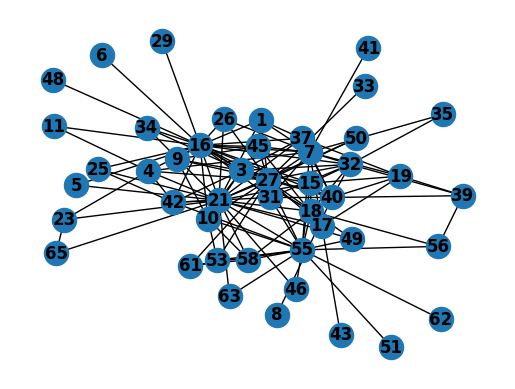

In [13]:
import matplotlib.pyplot as plt

ax1 = plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [14]:
nx.write_graphml(G, 'outputs/networkx_graph.ml')


In [15]:
# Show the categories for which no chemicals get assigned from our data set
for i in no_connections:
    if sum(outputs.iloc[:,i]) < 1:
        print(column_list[i])

Polynitroaromatics (Chronic toxicity)
Organotins (Chronic toxicity)
Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-
Organotins (Acute toxicity)
Diazoniums (Chronic toxicity)
Phosphinate Esters (Chronic toxicity)
Zirconium Compounds
beta-Naphthylamines, Sulfonated


# Category Corrections

\* Categories need review from an expert (such as Grace or Imran)

(cleared) categories are those that we have evidence for as being functional categories that we may genuinely just not have any instances of in our data set. 

## Anionic Surfactants
(cleared)

There appears to be an issue with the definition of Anionic Surfactants - I cannot match anything into the category, even chemicals listed online as part of the category. The issue seems to occur within the first two tests, which limit the atoms and charges that can appear in members of the category.

It may be productive to do a similar examination of the other empty catgeories, since I noticed this specific one because its emptiness stood out to me. 

In [16]:
#This is Dioctyl sodium sulfosuccinate by smiles, mol, and mol_weight. The logp and ws are just dummy numbers, 
# as they are not used by this category definition anyway. 
x = {'dsstox_sid':'DTXSID7041881', 'smiles': '[Na+].CCCCCCCCOC(=O)CC(C(=O)OCCCCCCCC)S([O-])(=O)=O', 'mol_weight':244.56 ,'logp':1.60, 'ws':0.00, "mol": Chem.MolFromSmiles("[Na+].CCCCCCCCOC(=O)CC(C(=O)OCCCCCCCC)S([O-])(=O)=O")}
x['ws'] = 1000*x['mol_weight']*x['ws']

In [17]:
singleQuery('Anionic Surfactants', x)

True

In [18]:
printTree(category_title="Anionic Surfactants",one_chem=x)

('CustomQuery', 'LogicalQuery', 'And', True)
	('CustomQuery', 'b:StructureQuery', 'Straight Alkyl Chain - Cs are adjacent in SMILES', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'Has branching with Carbon', 'does not process')
	('CustomQuery', 'LogicalQuery', 'Or', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'COS(=O)(=O)[OH,O-]', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'CS(=O)(=O)[OH,O-]', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'COP([OH1])([OH1])=O', 'does not process')
		('CustomQuery', 'b:StructureQuery', '[CX3;!$(Cc)](=O)[OX2H1]', 'does not process')
		('CustomQuery', 'b:StructureQuery', '[Si][OX2H]', 'does not process')


In [226]:
import re

sulfate=Chem.MolFromSmarts('COS(=O)(=O)[OH,O-]')
sulfonate=Chem.MolFromSmarts('CS(=O)(=O)[OH,O-]')
phosphate=Chem.MolFromSmarts('COP([OH1])([OH1])=O')
carboxylic=Chem.MolFromSmarts('[CX3;!$(Cc)](=O)[OX2H1]')
silicic=Chem.MolFromSmarts('[Si][OX2H]')

mol=x['mol']
smiles=x['smiles']
if set(smiles)-set(['C','c','O','P','S','i','[',']','(',')','=']):
    print("Set check: False")
m=re.compile(r'\(.?C.?\)')
if m.findall(smiles):
    print("Chain check: False")
rgroup_indexes=[i for i,atom in enumerate(smiles) if atom=='C']
if len(rgroup_indexes) == 0:
    extrema_check = [0]
else:
    extrema_check = rgroup_indexes
print("Substructure Checks (only one true needed):")
print (mol.HasSubstructMatch(sulfate), mol.HasSubstructMatch(sulfonate), mol.HasSubstructMatch(phosphate), mol.HasSubstructMatch(carboxylic),\
 mol.HasSubstructMatch(silicic))\
and sorted(rgroup_indexes)==range(min(extrema_check),max(extrema_check)+1) #Tests for straight alkyl chains


Set check: False
Substructure Checks (only one true needed):
False True False False False


## Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-
(cleared)

Due to the complex group name, I cannot use an internet search to provide myself with a category member. I attempted to find relevant chemicals on the CompTox Chemicals Dashboard, but some expert assistance here might be needed.

In [179]:
printTree("Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-")

('652', 'b:StructureQuery', 'c1([#16](=[#8])(=[#8])[#8])c([#6h]=[#6h]c2c([#16](=[#8])(=[#8])[#8])cc([#7h]c3nc([#6X4])nc([#6X4])n3)cc2)ccc([#7h]c2nc([#6X4])nc([#6X4])n2)c1', 'does not process')


In [222]:
# The tested chemical is Disodium 2,2'-(ethene-1,2-diyl)bis{5-[(4,6-dianilino-1,3,5-triazin-2-yl)amino]benzene-1-sulfonate
# Only the structure matters for the query, but the DTXSID and mol_weight are also
# provided for identifiability 

x = {'dsstox_sid':'DTXSID90889422', 'smiles': '[Na+].[Na+].[O-]S(=O)(=O)C1=C(C=CC2=C(C=C(NC3=NC(NC4=CC=CC=C4)=NC(NC4=CC=CC=C4)=N3)C=C2)S([O-])(=O)=O)C=CC(NC2=NC(NC3=CC=CC=C3)=NC(NC3=CC=CC=C3)=N2)=C1', 'mol_weight':936.93 ,'logp':1.60, 'ws':0.00}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']

In [223]:
printTree(category_title="Stilbene, derivatives of 4,4-bis(triazin-2-ylamino)-", one_chem=x)

('652', 'b:StructureQuery', 'c1([#16](=[#8])(=[#8])[#8])c([#6h]=[#6h]c2c([#16](=[#8])(=[#8])[#8])cc([#7h]c3nc([#6X4])nc([#6X4])n3)cc2)ccc([#7h]c2nc([#6X4])nc([#6X4])n2)c1', False)


## Zirconium Compounds
(cleared)

In [182]:
printTree('Zirconium Compounds')

('1028', 'LogicalQuery', 'And', 'does not process')
	('1023', 'b:StructureQuery', '[Zr]', 'does not process')
	('1025', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')


In [183]:
# The tested chemical is Zirconium(2+) 1-[{2-[bis(2-hydroxypropyl)amino]ethyl}(2-oxidoethyl)amino]propan-2-olate
# Only the structure and mol_weight matter for the query, but the DTXSID is also provided for identifiability 

x = {'dsstox_sid':'DTXSID30892278', 'smiles': '[Zr++].CC(O)CN(CCN(CC[O-])CC(C)[O-])CC(C)O', 'mol_weight':367.6 ,'logp':1.60, 'ws':0.00}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']



In [184]:
printTree(category_title='Zirconium Compounds', one_chem= x)

('1028', 'LogicalQuery', 'And', True)
	('1023', 'b:StructureQuery', '[Zr]', True)
	('1025', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', True)


## Benzotriazoles
This version deprecated


This category is a bit of an anomaly. There are acute and chronic versions in the original XML that both matched to chemicals, but then there is also this hard-coded category from the previous developer, which is not matching anything. Will need expert advice for this one.

In [185]:
#A count of matched to the Acute Toxicity XML-based version
print("Acute toxicity:")
print(len(outputs.loc[outputs['Benzotriazoles (Acute toxicity)']==True]))

#A count of matched to the Chronic Toxicity XML-based version
print("Chronic toxicity:")
print(len(outputs.loc[outputs['Benzotriazoles (Chronic toxicity)']==True]))

Acute toxicity:
21
Chronic toxicity:
5


In [186]:
print("Acute:")
printTree("Benzotriazoles (Acute toxicity)")
print("Chronic:")
printTree("Benzotriazoles (Chronic toxicity)")
print("New:")
printTree("Benzotriazoles")


Acute:
('203', 'LogicalQuery', 'And', 'does not process')
	('195', 'b:StructureQuery', 'c12c(cccc1)[#7]=,:[#7][#7v3]2', 'does not process')
	('197', 'b:ParameterQuery', 'log Kow', 5.0, 'LessThan', 'does not process')
	('200', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')
Chronic:
('1159', 'LogicalQuery', 'And', 'does not process')
	('1148', 'b:StructureQuery', 'c12c(cccc1)[#7]=,:[#7][#7v3]2', 'does not process')
	('1150', 'b:ParameterQuery', 'log Kow', 5.0, 'GreaterThan', 'does not process')
	('1153', 'b:ParameterQuery', 'log Kow', 8.0, 'LessThan', 'does not process')
	('1156', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')
New:
('CustomQuery', 'b:StructureQuery', 'N1N=NC2=C1C=CC=C2', 'does not process')


## Epoxides

(repaired and cleared)

This category caused problems in the code I was originally given due to an invalid SMILES for aziridine in the original code. I modified it based on aziridine smiles information found on the web, but it looks like in the case below, the epoxide match is the issue. Overall, this category is likely in need of review from someone with more chemistry knowledge. Based on a couple tests, might this just be a lowercase vs. uppercase issue?

In [187]:
printTree('Epoxides')

('CustomQuery', 'LogicalQuery', 'And', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'LogicalQuery', 'Or', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'c1oc1', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'c1cn1', 'does not process')


In [219]:
# The tested chemical is 1,2-epoxyhexane
# Only the structure and mol_weight matter for the query, but the DTXSID is also
# provided for identifiability 

x = {'dsstox_sid':'DTXSID10870872', 'smiles': 'CCCCC1CO1', 'mol_weight':100.161 ,'logp':1.60, 'ws':0.00}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']

In [220]:
printTree(category_title="Epoxides", one_chem=x)

('CustomQuery', 'LogicalQuery', 'And', False)
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'LogicalQuery', 'Or', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'c1oc1', 'does not process')
		('CustomQuery', 'b:StructureQuery', 'c1cn1', 'does not process')


In [221]:
#Epoxide substructure matches when Smarts piece is capitalized (chem obviously satisfies parameter query)
x['mol'].HasSubstructMatch(Chem.MolFromSmarts('C1OC1'))

True

## Diazoniums (Chronic toxicity)
(cleared)

This category we will assume is correct because it differs from its nonempty partner only by the LogKow parameter query. Thus, there could reasonably just be no chemicals from this category in our data set. 

In [191]:
printTree('Diazoniums (Chronic toxicity)')

('1427', 'LogicalQuery', 'And', 'does not process')
	('1419', 'b:StructureQuery', '[#7]#[#7+]c', 'does not process')
	('1421', 'b:ParameterQuery', 'log Kow', 8.0, 'GreaterThanOrEqualTo', 'does not process')
	('1424', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')


In [192]:
printTree('Diazoniums (Acute toxicity)')

('282', 'LogicalQuery', 'And', 'does not process')
	('274', 'b:StructureQuery', '[#7]#[#7+]c', 'does not process')
	('276', 'b:ParameterQuery', 'log Kow', 8.0, 'LessThan', 'does not process')
	('279', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')


## beta-Naphthylamines, Sulfonated
(cleared)

My web searches for sulfonated beta napthylamines indicated 2-Amino-1-naphthalenesulfonic acid and 2-Naphthylamine-8-sulfonic acid as products of sulfonating beta-Naphthylamine, but neither matches to the category. This is a hard-coded category with a very complex definition, as can be seen in the trees below. I could definitely use some input on whether the chemicals I used should actually fall into this category and, if so, how to fix its definition. 

In [193]:
printTree('beta-Naphthylamines, Sulfonated')

('CustomQuery', 'LogicalQuery', 'or', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH1,$(c[OH]),$(c[NH2])][cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH1,$(c[OH]),$(c[NH2])][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2

In [194]:
# The tested chemical is 2-Amino-1-naphthalenesulfonic acid
# Only the structure matters for the query, but the DTXSID and mol_weight are also
# provided for identifiability 

x = {'dsstox_sid':'DTXSID7020922', 'smiles': 'NC1=CC=C2C=CC=CC2=C1S(O)(=O)=O', 'mol_weight':223.25 ,'logp':1.60, 'ws':0.00}
x['mol'] = Chem.MolFromSmiles(x['smiles'])


In [195]:
printTree(category_title='beta-Naphthylamines, Sulfonated', one_chem=x)

('CustomQuery', 'LogicalQuery', 'or', False)
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH1,$(c[OH]),$(c[NH2])][cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH1,$(c[OH]),$(c[NH2])][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])

In [196]:
# The tested chemical is 2-Amino-8-naphthalenesulfonic acid (Badische acid)
# Only the structure matters for the query, but the DTXSID and mol_weight are also
# provided for identifiability 

x = {'dsstox_sid':'DTXSID00235335', 'smiles': 'NC1=CC2=C(C=CC=C2S(O)(=O)=O)C=C1', 'mol_weight':223.25 ,'logp':1.60, 'ws':0.00}
x['mol'] = Chem.MolFromSmiles(x['smiles'])

In [197]:
printTree(category_title='beta-Naphthylamines, Sulfonated', one_chem=x)

('CustomQuery', 'LogicalQuery', 'or', False)
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH1,$(c[OH]),$(c[NH2])][cH][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])])[cH][cH1,$(c[OH]),$(c[NH2])][cH]c2[cH][cH]1, Must Match in Both Directions', 'does not process')
	('CustomQuery', 'b:StructureQuery', '[NH2]c1[cH1,$(cO)]c2[cH,$(c[OH]),$(c[NH2])][cH][cH]c([$(S(=O)(=O)[OH]),$(S(=O)(=O)[CH2][CH2]S[OH3])

## Organotins (Chronic toxicity) and Organotins (Acute toxicity)
(cleared)

As the chronic and acute versions of these compounds differ only on parameter definitions, if we can find a working example of either, we will consider them both to be cleared. 

In [198]:
printTree("Organotins (Chronic toxicity)")

('CustomQuery', 'LogicalQuery', 'And', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Log Kow', 13.7, 'GreaterThanOrEqualTo', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'C[Sn]', 'does not process')


In [199]:
printTree('Organotins (Acute toxicity)')

('CustomQuery', 'LogicalQuery', 'And', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Log Kow', 13.7, 'LessThanOrEqualTo', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'C[Sn]', 'does not process')


In [200]:
# The tested chemical is Cyhexatin

x = {'dsstox_sid':'DTXSID1032357', 'smiles': 'O[Sn](C1CCCCC1)(C1CCCCC1)C1CCCCC1', 'mol_weight':385.179 ,'logp':5.44, 'ws':0.000000416}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']



In [201]:
printTree(category_title='Organotins (Acute toxicity)', one_chem=x)

('CustomQuery', 'LogicalQuery', 'And', True)
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Log Kow', 13.7, 'LessThanOrEqualTo', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'C[Sn]', 'does not process')


## Cobalt
(cleared)

In [202]:
printTree("Cobalt")

('263', 'LogicalQuery', 'And', 'does not process')
	('252', 'b:StructureQuery', '[Co]', 'does not process')
	('254', 'b:ParameterQuery', 'log Kow', 8.0, 'LessThan', 'does not process')
	('257', 'b:ParameterQuery', 'Molecular Weight', 1000.0, 'LessThan', 'does not process')
	('260', 'b:ParameterQuery', 'Water Solubility', 1.0, 'GreaterThanOrEqualTo', 'does not process')


In [217]:
# The tested chemical is Cobalt chloride (CoCl3)

x = {'dsstox_sid':'DTXSID5065011', 'smiles': 'Cl[Co](Cl)Cl', 'mol_weight':165.28 ,'logp':1.16, 'ws':0.04}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']



In [218]:
printTree(category_title='Cobalt', one_chem=x)

('263', 'LogicalQuery', 'And', True)
	('252', 'b:StructureQuery', '[Co]', True)
	('254', 'b:ParameterQuery', 'log Kow', 8.0, 'LessThan', True)
	('257', 'b:ParameterQuery', 'Molecular Weight', 1000.0, 'LessThan', True)
	('260', 'b:ParameterQuery', 'Water Solubility', 1.0, 'GreaterThanOrEqualTo', True)


## Polynitroaromatics (Chronic toxicity) 
(cleared)

Despite having a nonempty partner, the structural query for this category is not the same. Thus, we should try to find an example of this category and test it. 

My web search so far has not turned up any chemicals that would meet the definition for chronic toxicity here. In particular, all identified polynitroaromatics so far have logp values far too low for this definition. 

In [205]:
printTree("Polynitroaromatics (Chronic toxicity)")

('CustomQuery', 'LogicalQuery', 'And', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'N[$(c1c(N)cccc1),$(c1cc(N)ccc1),$(c1ccc(N)cc1),$(c1cncc(N)c1)]', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Log Kow', 10, 'GreaterThanOrEqualTo', 'does not process')


In [206]:
printTree("Polynitroaromatics (Acute toxicity)")

('CustomQuery', 'LogicalQuery', 'And', 'does not process')
	('CustomQuery', 'b:StructureQuery', 'ON(=O)[$(c1c(N(O)=O)cccc1),$(c1cc(N(O)=O)ccc1),$(c1ccc(N(O)=O)cc1),$(c1cncc(N(O)=O)c1)]', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Molecular Weight', 1000, 'LessThan', 'does not process')
	('CustomQuery', 'b:ParameterQuery', 'Log Kow', 7, 'LessThan', 'does not process')


In [229]:
# The tested chemical is TNT

x = {'dsstox_sid':'DTXSID7024372', 'smiles': 'CC1=C(C=C(C=C1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O', 'mol_weight':227.132 ,'logp':1.73, 'ws':0.000567}
x['mol'] = Chem.MolFromSmiles(x['smiles'])
x['ws'] = 1000*x['mol_weight']*x['ws']

In [ ]:
printTree(category_title="Polynitroaromatics (Acute toxicity)", one_chem=x)

## Phosphinate Esters (Chronic toxicity)
(cleared)

This category we will assume is correct because it differs from its nonempty partner only by the LogKow parameter query. Thus, there could reasonably just be no chemicals from this category in our data set. 

In [207]:
printTree('Phosphinate Esters (Chronic toxicity)')

('1312', 'LogicalQuery', 'And', 'does not process')
	('1301', 'b:StructureQuery', '[#6][#8][#15v5](=[#8])([#6])[#6]', 'does not process')
	('1303', 'b:ParameterQuery', 'log Kow', 5.0, 'GreaterThan', 'does not process')
	('1306', 'b:ParameterQuery', 'log Kow', 8.0, 'LessThan', 'does not process')
	('1309', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')


In [208]:
printTree('Phosphinate Esters (Acute toxicity)')

('641', 'LogicalQuery', 'And', 'does not process')
	('633', 'b:StructureQuery', '[#6][#8][#15v5](=[#8])([#6])[#6]', 'does not process')
	('635', 'b:ParameterQuery', 'log Kow', 5.0, 'LessThan', 'does not process')
	('638', 'b:ParameterQuery', 'Molecular weight', 1000.0, 'LessThan', 'does not process')
